<a href="https://colab.research.google.com/github/Allavudeen/MachineLearning/blob/main/Regression/PredictCarPrice/Car_Price_Prediction_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/Allavudeen/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 42 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 17.39 KiB | 1.74 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score

#reading the dataset

cars = pd.read_csv("MachineLearning/Regression/PredictCarPrice/CarPrice_Assignment.csv")

In [7]:
# Summary of the dataset: 205 rows, 26 columns
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# Symboling: -2 (least risky) to most risky +3
# most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

,count
symboling,
0,67
1,54
2,32
3,27
-1,22
-2,3


In [10]:
# aspiration: An (internal combustion) engine properly showing
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbo charging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

,count
aspiration,
std,168
turbo,37


In [12]:
# drivewheel: frontwheel, rarewheel, or four-wheel drive

cars['drivewheel'].astype('category').value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


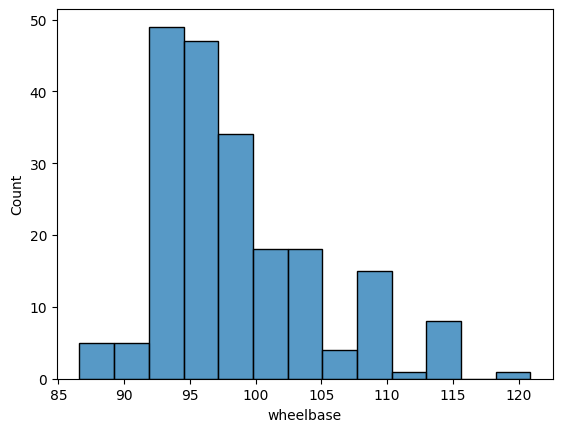

In [22]:
# wheelbase: distance between centre of front and rarewheels

sns.histplot(cars['wheelbase'])
plt.show()

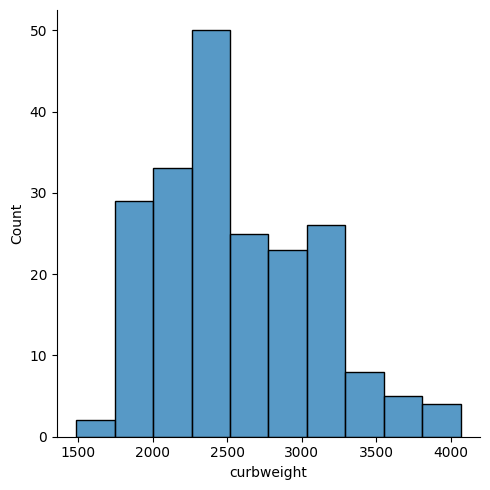

In [19]:
# curbweight: weight of car without occupants or baggage

sns.displot(cars['curbweight'])
plt.show()

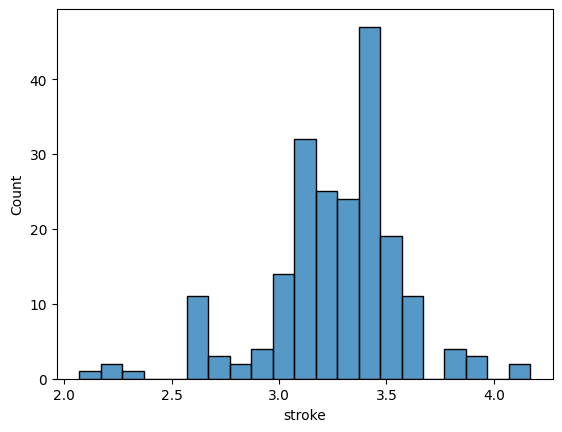

In [23]:
# stroke: volume of the engine (the distance traveled by the piston in each cycle)

sns.histplot(cars['stroke'])
plt.show()

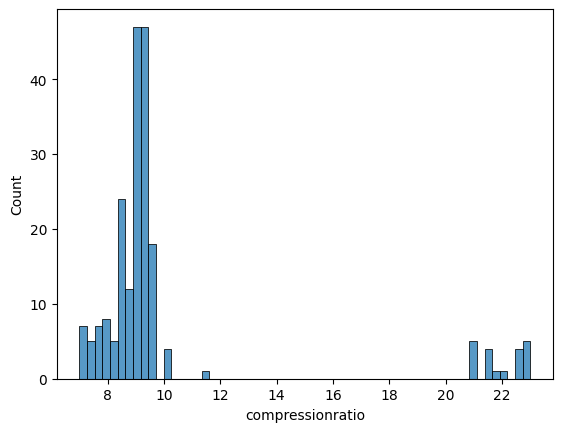

In [24]:
# compression ration: ration of volume of compression chamber at largest capacity to least capacity

sns.histplot(cars['compressionratio'])
plt.show()

/tmp/ipython-input-25-3166544910.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])


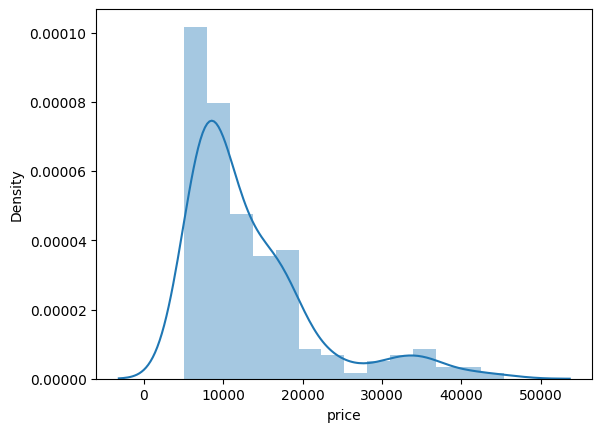

In [25]:
# target variable: price of car

sns.distplot(cars['price'])
plt.show()